In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive')
#!ls

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
bank_notes = pd.read_csv('bank_note_data.csv')
bank_notes.shape
#Output: (1372, 5)

(1372, 5)

In [6]:
bank_notes.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


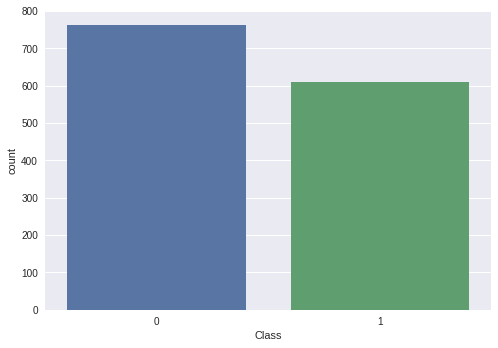

In [0]:
sns.countplot(x='Class', data=bank_notes)

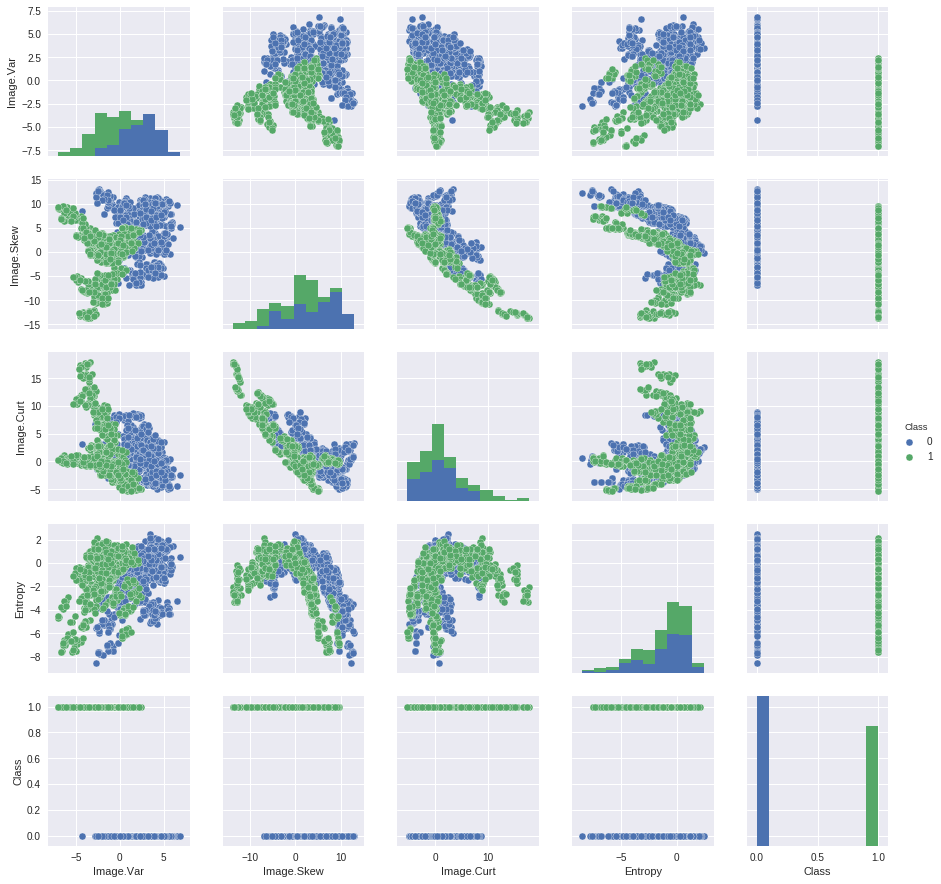

In [0]:
sns.pairplot(data=bank_notes, hue='Class')

In [0]:
bank_notes_without_class = bank_notes.drop('Class', axis=1)

In [0]:
scaler = StandardScaler()
scaler.fit(bank_notes_without_class)
scaled_features = pd.DataFrame(data=scaler.transform(bank_notes_without_class), columns=bank_notes_without_class.columns)

In [0]:
# Rename 'Class' to 'Authentic'
bank_notes = bank_notes.rename(columns={'Class': 'Authentic'})
# 'Forged'
bank_notes.loc[bank_notes['Authentic'] == 0, 'Forged'] = 1
bank_notes.loc[bank_notes['Authentic'] == 1, 'Forged'] = 0

In [0]:
# X and y
X = scaled_features
y = bank_notes[['Authentic', 'Forged']]
# Convert X and y to Numpy arrays
X = X.as_matrix()
y = y.as_matrix()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
learning_rate = 0.01
training_epochs = 150
batch_size = 101

In [0]:
n_hidden_1 = 4 # # nodes in first hidden layer
n_hidden_2 = 4 # # nodes in second hidden layer
n_input = 4 # input shape
n_classes = 2 # total classes (authentic / forged)
n_samples = X_train.shape[0] # # samples

**INITIALIZE THE INPUTS**

In [0]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])


**Define the weights**

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


Instructions for updating:
Colocations handled automatically by placer.


**Build the network**


In [0]:
def multilayer_perceptron(x, weights, biases):
    
    '''
    x: Placeholder for data input
    weights: Dictionary of weights
    biases: Dictionary of biases
    
    '''
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    
    return out_layer

In [0]:
preds = multilayer_perceptron(x, weights, biases)

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=preds))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [19]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
costs = []
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for batch in range(total_batch):
        batch_x = X_train[batch*batch_size : (1+batch)*batch_size]
        batch_y = y_train[batch*batch_size : (1+batch)*batch_size]
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
    costs.append(avg_cost)
    
print("Model has completed {} epochs of training.".format(training_epochs))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 1 cost=0.7041
Epoch: 2 cost=0.6665
Epoch: 3 cost=0.6517
Epoch: 4 cost=0.6279
Epoch: 5 cost=0.5926
Epoch: 6 cost=0.5429
Epoch: 7 cost=0.4268
Epoch: 8 cost=0.2442
Epoch: 9 cost=0.1598
Epoch: 10 cost=0.1119
Epoch: 11 cost=0.0846
Epoch: 12 cost=0.0652
Epoch: 13 cost=0.0524
Epoch: 14 cost=0.0436
Epoch: 15 cost=0.0352
Epoch: 16 cost=0.0277
Epoch: 17 cost=0.0217
Epoch: 18 cost=0.0177
Epoch: 19 cost=0.0148
Epoch: 20 cost=0.0127
Epoch: 21 cost=0.0112
Epoch: 22 cost=0.0100
Epoch: 23 cost=0.0090
Epoch: 24 cost=0.0082
Epoch: 25 cost=0.0075
Epoch: 26 cost=0.0069
Epoch: 27 cost=0.0063
Epoch: 28 cost=0.0059
Epoch: 29 cost=0.0055
Epoch: 30 cost=0.0051
Epoch: 31 cost=0.0047
Epoch: 32 cost=0.0044
Epoch: 33 cost=0.0042
Epoch: 34 cost=0.0039
Epoch: 35 cost=0.0037
Epoch: 36 cost=0.0035
Epoch: 37 cost=0.0033
Epoch: 38 cost=0.0031
Epoch: 39 cost=0.0030
Epoch: 40 cost=0.0028
Epoch: 41 cost=0.0027
Epoch: 42 cost=0.0025
Epoch: 43 c

In [0]:
correct_predictions = tf.cast(tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1)), tf.float32)

In [0]:
#Training accuracy
#accuracy_history = []
#accuracy = tf.reduce_mean(correct_predictions)
#accuracy = (sess.run(accuracy,feed_dict = {x:X_train, y: y_train}))
#accuracy_history.append(accuracy)
#print("Training Accuracy:", accuracy)

In [35]:
#Training accuracy
accuracy_history = []
accuracy = tf.reduce_mean(correct_predictions)
accuracy = (sess.run(accuracy,feed_dict = {x:X_test, y: y_test}))
accuracy_history.append(accuracy)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.99636364


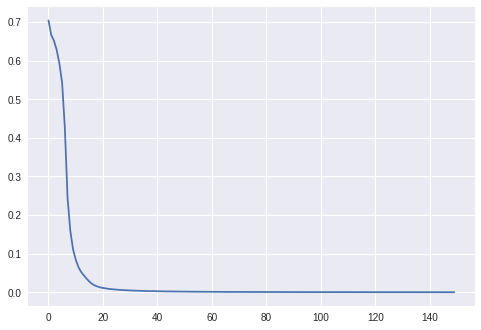

In [23]:
#COST Plot
plt.plot(costs)
plt.show()

**Compare the model**

In [0]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)

In [27]:
print(classification_report(y_test, preds_rfc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       127
           1       0.99      1.00      1.00       148

   micro avg       1.00      0.99      0.99       275
   macro avg       1.00      0.99      0.99       275
weighted avg       1.00      0.99      0.99       275
 samples avg       0.99      0.99      0.99       275



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


**PLot the confusion matrix**

In [28]:
# Get only the 'Forged' column values from y_test and preds_rfc
y_test_forged = [item[1] for item in y_test]
preds_rfc_forged = [item[1] for item in preds_rfc]
# Print confusion matrix
print(confusion_matrix(y_test_forged, preds_rfc_forged))


[[126   1]
 [  0 148]]


In [0]:
#for i in range(15,100):
 # prediction_run = sess.run(prediction, feed_dict = {x: X[i].reshape(1,4)})
  #accuracy_run = sess.run(accuracy, feed_dict = {x: X[i].reshape(1,4) , y:[0,1]})
  #print('Original class:' , y1[i], 'Prediction values:', prediction_run)